In [1]:
# Generative graphs
%matplotlib inline
import networkx as nx

from collections import defaultdict

from prepare_datasets import preprocess_generative_graph
from graphs import generate_graph, attach_graph_attributes
from measurements import get_graph_measurements, compare_graph_measurements, print_comparison_results
from graph_to_dataframe import graph_to_training_dataframe, preprocess_dataframe
from recreate_graph import get_trained_model, recreate_by_priority_rank

Preparing primary_school...
Preparing workplace...
Preparing highschool_2011...
Preparing highschool_2012...
Preparing hospital...
Preparing moreno_blogs...
Preparing moreno_sheep...
Preparing moreno_seventh...
Preparing petster-hamster...
Preparing email-Eu...
done


Using TensorFlow backend.
/home/smoq/.virtualenvs/cna/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [2]:
graph_families = [
    {
        'name': 'erdos renyi',
        'func': nx.erdos_renyi_graph,
        'params': [
            {'n': 30, 'p': 0.05},
            {'n': 30, 'p': 0.1},
            {'n': 30, 'p': 0.3}
        ]
    },
    {
        'name': 'watts strogatz',
        'func': nx.watts_strogatz_graph,
        'params': [
            {'n': 30, 'k': 2, 'p': 0.05},
            {'n': 30, 'k': 2, 'p': 0.1},
            {'n': 30, 'k': 2, 'p': 0.3}
        ]
    },
    {
        'name': 'barabasi albert',
        'func': nx.barabasi_albert_graph,
        'params': [
            {'n': 30, 'm': 1},
            {'n': 30, 'm': 2},
            {'n': 30, 'm': 5}
        ]
    },
]

In [3]:
EPOCHS = 64
BATCH_SIZE = 64
VERBOSE = 0

<class 'networkx.classes.graph.Graph'>
900/900 [==============================] - 0s 20us/step
loss: 0.06522495199615756, accuracy: 0.9355555555555556


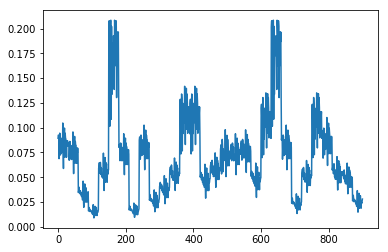

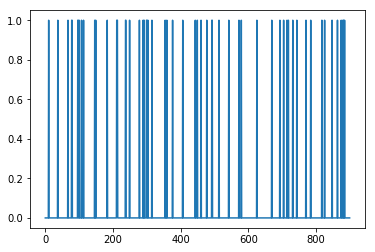

Cannot compute average_shortest_path_length - Graph is not weakly connected.
Cannot compute diameter - Found infinite path length because the digraph is not strongly connected
Cannot compute diameter - Found infinite path length because the digraph is not strongly connected
<class 'networkx.classes.graph.Graph'>


/home/smoq/.virtualenvs/cna/lib/python3.6/site-packages/networkx/algorithms/assortativity/correlation.py:287: RuntimeWarning: invalid value encountered in double_scalars
  return (xy*(M-ab)).sum()/numpy.sqrt(vara*varb)


900/900 [==============================] - 0s 26us/step
loss: 0.10024508824571968, accuracy: 0.8955555555555555


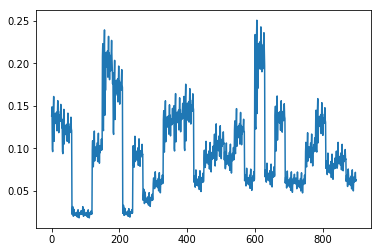

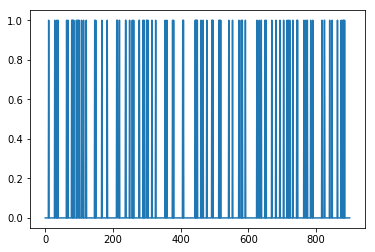

Cannot compute diameter - Found infinite path length because the digraph is not strongly connected
<class 'networkx.classes.graph.Graph'>


/home/smoq/.virtualenvs/cna/lib/python3.6/site-packages/networkx/algorithms/assortativity/correlation.py:287: RuntimeWarning: divide by zero encountered in double_scalars
  return (xy*(M-ab)).sum()/numpy.sqrt(vara*varb)


900/900 [==============================] - 0s 27us/step
loss: 0.22213886486159432, accuracy: 0.6844444444444444


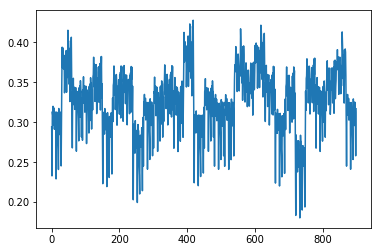

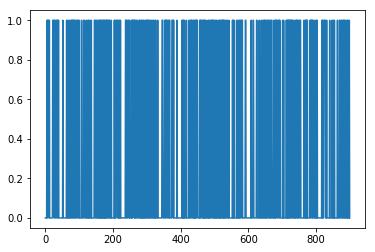

<class 'networkx.classes.graph.Graph'>
900/900 [==============================] - 0s 39us/step
loss: 0.06348890741666158, accuracy: 0.9333333333333333


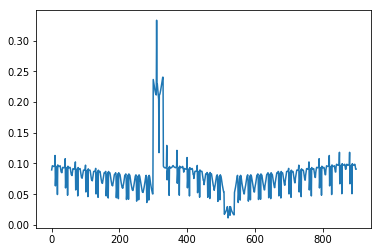

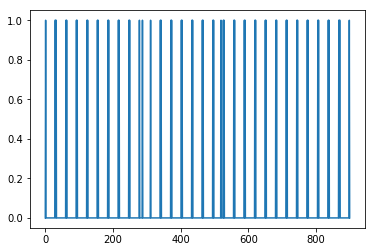

Cannot compute diameter - Found infinite path length because the digraph is not strongly connected
<class 'networkx.classes.graph.Graph'>
900/900 [==============================] - 0s 45us/step
loss: 0.0651509255833096, accuracy: 0.9333333333333333


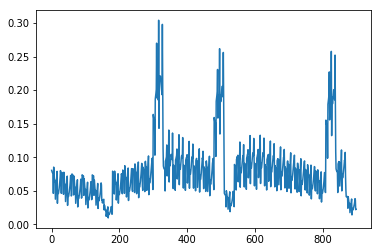

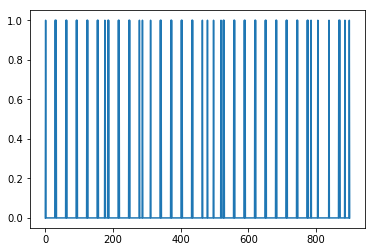

Cannot compute diameter - Found infinite path length because the digraph is not strongly connected
<class 'networkx.classes.graph.Graph'>
900/900 [==============================] - 0s 56us/step
loss: 0.06695639776065945, accuracy: 0.9333333333333333


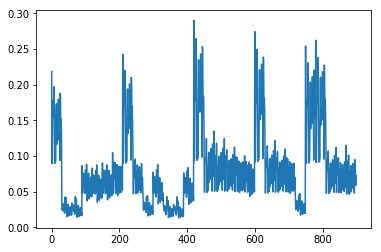

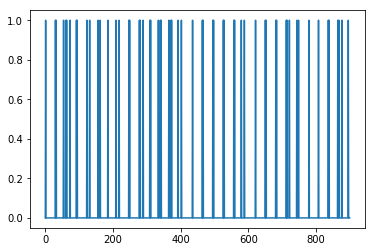

Cannot compute diameter - Found infinite path length because the digraph is not strongly connected
<class 'networkx.classes.graph.Graph'>
900/900 [==============================] - 0s 53us/step
loss: 0.06324336488627726, accuracy: 0.9355555555555556


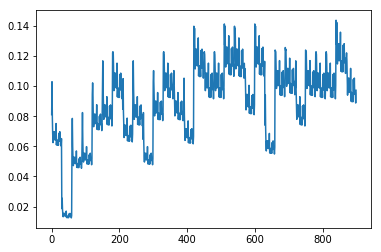

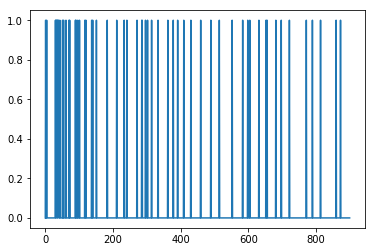

Cannot compute diameter - Found infinite path length because the digraph is not strongly connected
<class 'networkx.classes.graph.Graph'>
900/900 [==============================] - 0s 51us/step
loss: 0.11170737557941013, accuracy: 0.8755555555555555


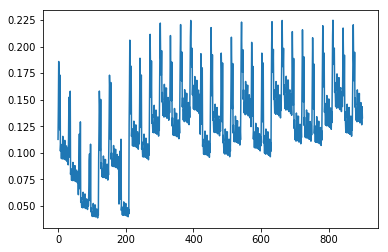

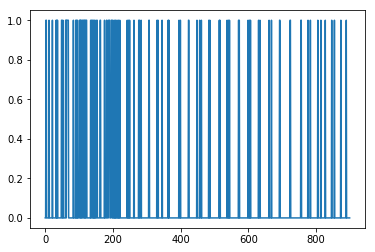

Cannot compute diameter - Found infinite path length because the digraph is not strongly connected
<class 'networkx.classes.graph.Graph'>
900/900 [==============================] - 0s 62us/step
loss: 0.20190901541047626, accuracy: 0.7222222222222222


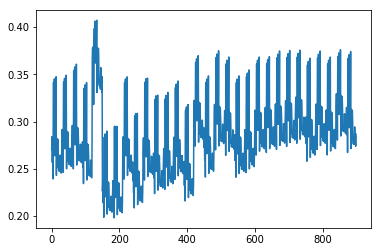

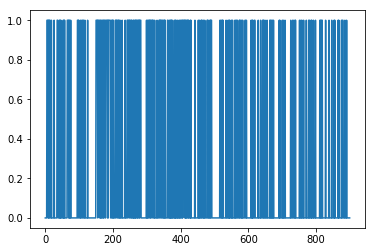

Cannot compute diameter - Found infinite path length because the digraph is not strongly connected


In [4]:
results = defaultdict(list)
for graph_family in graph_families:
    for params in graph_family['params']:
        # Generate graph
        graph = generate_graph(graph_family['func'], params)
        # Set weights to 1 and change graph type to directed
        graph = preprocess_generative_graph(graph)
        # Graph attributes
        attach_graph_attributes(graph)
        # Training df
        df = graph_to_training_dataframe(graph)
        # Preprocess training df
        df = preprocess_dataframe(df, graph.number_of_nodes())
        # Train model
        model = get_trained_model(df, epochs=EPOCHS, batch_size=BATCH_SIZE, verbose=VERBOSE)
        # Recreate graph
        new_graph = recreate_by_priority_rank(graph, df, model)
        # Get measurements
        graph_measurements = get_graph_measurements(graph)
        new_graph_measurements = get_graph_measurements(new_graph)
        # Make comparison
        comparison = compare_graph_measurements(graph_measurements, new_graph_measurements)
        results[graph_family['name']].append(comparison)

In [5]:
for key, value in results.items():
    print(key)
    for i, comparison_result in enumerate(value):
        print('graph #{}'.format(i+1))
        print_comparison_results(comparison_result)
        print()

erdos renyi
graph #1
(KS test p-value)  degree_centrality: 0.7600465102607563              [passed: True]
(KS test p-value)  closeness_centrality: 0.025856269697631676         [passed: False]
(KS test p-value)  betweenness_centrality: 0.5371995394073502         [passed: True]
(KS test p-value)  pagerank: 0.011313647722167194                     [passed: False]
(abs distance)     average_shortest_path_length: None                 [passed: None]
(abs distance)     diameter: None                                     [passed: None]
(abs distance)     degree_centralization: 0.3586956521739134          [passed: False]
(abs distance)     closeness_centralization: 0.7018006877894452       [passed: False]
(abs distance)     betweenness_centralization: 0.02513781739218942    [passed: True]
(abs distance)     pagerank_centralization: 0.3443415178813791        [passed: False]
(abs distance)     density: 0.034482758620689655                      [passed: True]
(abs distance)     degree_assortativity